## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Data exploration

In [2]:
#Load the the cov-19 patient data
cov_19_data=data=pd.read_csv('patient.csv')

In [3]:
# get the first 100 columns of cov-19 patient data
cov_19_data.head(10)

id     sex  birth_year country               region group  \
0   1  female      1984.0   China  filtered at airport   NaN   
1   2    male      1964.0   Korea  filtered at airport   NaN   
2   3    male      1966.0   Korea         capital area   NaN   
3   4    male      1964.0   Korea         capital area   NaN   
4   5    male      1987.0   Korea         capital area   NaN   
5   6    male      1964.0   Korea         capital area   NaN   
6   7    male      1991.0   Korea         capital area   NaN   
7   8  female      1957.0   Korea         Jeollabuk-do   NaN   
8   9  female      1992.0   Korea         capital area   NaN   
9  10  female      1966.0   Korea         capital area   NaN   

       infection_reason  infection_order  infected_by  contact_number  \
0        visit to Wuhan              1.0          NaN            45.0   
1        visit to Wuhan              1.0          NaN            75.0   
2        visit to Wuhan              1.0          NaN            16.0   
3        visit to Wuhan              1.0          NaN            95.0   
4        visit to Wuhan              1.0          NaN            31.0   
5  contact with patient              2.0          3.0            17.0   
6        visit to Wuhan              1.0          NaN             9.0   
7        visit to Wuhan              1.0          NaN           113.0   
8  contact with patient              2.0          5.0             2.0   
9  contact with patient              3.0          6.0            43.0   

  confirmed_date released_date deceased_date     state  
0     2020-01-20    2020-02-06           NaN  released  
1     2020-01-24    2020-02-05           NaN  released  
2     2020-01-26    2020-02-12           NaN  released  
3     2020-01-27    2020-02-09           NaN  released  
4     2020-01-30           NaN           NaN  isolated  
5     2020-01-30    2020-02-19           NaN  released  
6     2020-01-30    2020-02-15           NaN  released  
7     2020-01-31    2020-02-12           NaN  released  
8     2020-01-31    2020-02-24           NaN  released  
9     2020-01-31    2020-02-19           NaN  released

In [4]:
# print the data type of each columns 
cov_19_data.dtypes

id                    int64
sex                  object
birth_year          float64
country              object
region               object
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object

In [5]:
# to see the count of unique values for each gender type
cov_19_data['sex'].value_counts()

female    167
male      159
Name: sex, dtype: int64

In [6]:
cov_19_data.describe()

id   birth_year  infection_order  infected_by  contact_number
count  4812.000000   299.000000        35.000000    62.000000       32.000000
mean   2406.500000  1972.712375         2.257143   330.741935       96.843750
std    1389.249078    17.589967         1.357828   458.786744      224.669522
min       1.000000  1934.000000         1.000000     3.000000        0.000000
25%    1203.750000  1959.000000         1.000000    29.250000        2.750000
50%    2406.500000  1971.000000         2.000000   126.000000       16.500000
75%    3609.250000  1987.000000         3.000000   372.000000       69.750000
max    4812.000000  2018.000000         6.000000  1768.000000     1160.000000

In [7]:
# We print the percentage of missing data by column
round((cov_19_data.isnull().sum(axis=0)*100/len(cov_19_data)),2).sort_values(ascending=False)

deceased_date       99.58
released_date       99.42
contact_number      99.33
infection_order     99.27
infected_by         98.71
group               98.42
infection_reason    97.30
birth_year          93.79
region              93.50
sex                 93.23
state                0.00
confirmed_date       0.00
country              0.00
id                   0.00
dtype: float64

This result gives from the start now the intuition that the clustering precision with kmeans will not be high because of the missing data. This issue will solved in the futur when we get more data.

 ## Data Cleaning

In [8]:
# First we didn't need the coloumn id  because it deosn't give any information
cov_19_data_clean=cov_19_data.drop(['id'],axis=1)
cov_19_data_clean.head(10)

sex  birth_year country               region group  \
0  female      1984.0   China  filtered at airport   NaN   
1    male      1964.0   Korea  filtered at airport   NaN   
2    male      1966.0   Korea         capital area   NaN   
3    male      1964.0   Korea         capital area   NaN   
4    male      1987.0   Korea         capital area   NaN   
5    male      1964.0   Korea         capital area   NaN   
6    male      1991.0   Korea         capital area   NaN   
7  female      1957.0   Korea         Jeollabuk-do   NaN   
8  female      1992.0   Korea         capital area   NaN   
9  female      1966.0   Korea         capital area   NaN   

       infection_reason  infection_order  infected_by  contact_number  \
0        visit to Wuhan              1.0          NaN            45.0   
1        visit to Wuhan              1.0          NaN            75.0   
2        visit to Wuhan              1.0          NaN            16.0   
3        visit to Wuhan              1.0          NaN            95.0   
4        visit to Wuhan              1.0          NaN            31.0   
5  contact with patient              2.0          3.0            17.0   
6        visit to Wuhan              1.0          NaN             9.0   
7        visit to Wuhan              1.0          NaN           113.0   
8  contact with patient              2.0          5.0             2.0   
9  contact with patient              3.0          6.0            43.0   

  confirmed_date released_date deceased_date     state  
0     2020-01-20    2020-02-06           NaN  released  
1     2020-01-24    2020-02-05           NaN  released  
2     2020-01-26    2020-02-12           NaN  released  
3     2020-01-27    2020-02-09           NaN  released  
4     2020-01-30           NaN           NaN  isolated  
5     2020-01-30    2020-02-19           NaN  released  
6     2020-01-30    2020-02-15           NaN  released  
7     2020-01-31    2020-02-12           NaN  released  
8     2020-01-31    2020-02-24           NaN  released  
9     2020-01-31    2020-02-19           NaN  released

For now, we will keep only features with missing data rate lower than 90%, so we will drop the following features:
    * deceased_date
    * released_date
    * contact_number
    * infection_order

In [9]:
cov_19_data_clean=cov_19_data_clean.drop(['deceased_date'],axis=1)
cov_19_data_clean=cov_19_data_clean.drop(['released_date'],axis=1)
cov_19_data_clean=cov_19_data_clean.drop(['contact_number'],axis=1)
cov_19_data_clean=cov_19_data_clean.drop(['infection_order'],axis=1)

In [10]:
cov_19_data_clean.head(10)

sex  birth_year country               region group  \
0  female      1984.0   China  filtered at airport   NaN   
1    male      1964.0   Korea  filtered at airport   NaN   
2    male      1966.0   Korea         capital area   NaN   
3    male      1964.0   Korea         capital area   NaN   
4    male      1987.0   Korea         capital area   NaN   
5    male      1964.0   Korea         capital area   NaN   
6    male      1991.0   Korea         capital area   NaN   
7  female      1957.0   Korea         Jeollabuk-do   NaN   
8  female      1992.0   Korea         capital area   NaN   
9  female      1966.0   Korea         capital area   NaN   

       infection_reason  infected_by confirmed_date     state  
0        visit to Wuhan          NaN     2020-01-20  released  
1        visit to Wuhan          NaN     2020-01-24  released  
2        visit to Wuhan          NaN     2020-01-26  released  
3        visit to Wuhan          NaN     2020-01-27  released  
4        visit to Wuhan          NaN     2020-01-30  isolated  
5  contact with patient          3.0     2020-01-30  released  
6        visit to Wuhan          NaN     2020-01-30  released  
7        visit to Wuhan          NaN     2020-01-31  released  
8  contact with patient          5.0     2020-01-31  released  
9  contact with patient          6.0     2020-01-31  released

# Data visualisation

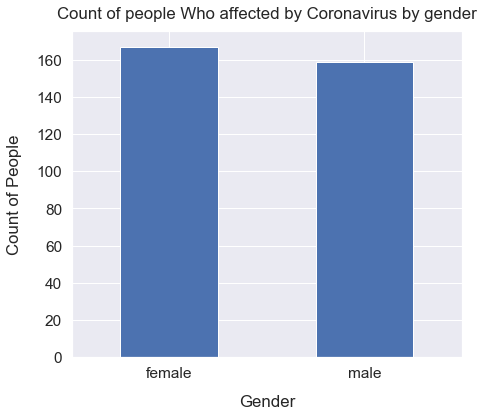

In [11]:
sns.set(font_scale=1.4)
cov_19_data_clean['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of people Who affected by Coronavirus by gender", y=1.02);

Until now, there is not a big difference between the number of women and men affected but from this observation, we can remark that women are a little bit more affected by the virus Cov-19.
In future work, we will try to answer the question: Why?

Text(0, 0.5, 'FREQUENCY')

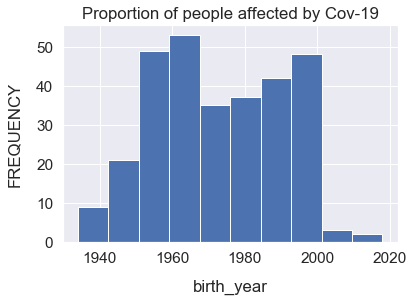

In [12]:
cov_19_data_clean['birth_year'].plot.hist(title="Proportion of people affected by Cov-19")
plt.xlabel('birth_year',labelpad=14)
plt.ylabel('FREQUENCY',labelpad=14)

This result confirms the oldest people are more affected by Cov-19 then others, because we can remark that the frequency of peoples
who were born between the year 1950 and 1970 is more higher

TypeError: nan is not a string

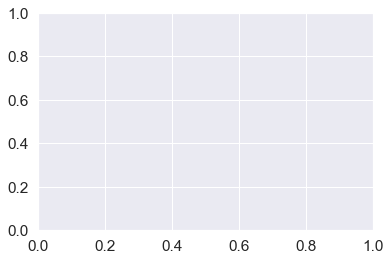

In [18]:
plt.scatter(cov_19_data_clean['region'], cov_19_data_clean['sex'])
plt.xlim()